In [1]:
import sys
sys.path.append("../")
from OVA import *
import sympy as sym
sym.init_printing()

In [2]:
r = sym.Symbol('r', positive=True)
t, z = sym.symbols('theta, z')
cylind = CoordinateSystem(r=r, t=t, p=z, coordinate='Cylindrical')

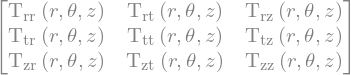

In [3]:
# vector U
Ur = sym.Function('U_r')(r, t, z); Ut = sym.Function('U_theta')(r, t, z); Uz = sym.Function('U_z')(r, t, z);
U = [Ur, Ut, Uz]
# scalar function phi
phi = sym.Function('phi')(r, t, z)
# 2-rank tensor T
Trr = sym.Function('T_{rr}')(r, t, z); Trt = sym.Function('T_{rt}')(r, t, z); Trz = sym.Function('T_{rz}')(r, t, z);
Ttr = sym.Function('T_{tr}')(r, t, z); Ttt = sym.Function('T_{tt}')(r, t, z); Ttz = sym.Function('T_{tz}')(r, t, z);
Tzr = sym.Function('T_{zr}')(r, t, z); Tzt = sym.Function('T_{zt}')(r, t, z); Tzz = sym.Function('T_{zz}')(r, t, z);
T = sym.Matrix([[Trr, Trt, Trz], [Ttr, Ttt, Ttz], [Tzr, Tzt, Tzz]])
display(U)
display(phi)
display(T)

### Grad of function $\phi (r,\theta, z)$:

$\nabla \phi = \hat{e}_r \frac{\partial \phi}{\partial r} + \hat{e}_\theta \frac{1}{r} \frac{\partial \phi}{\partial \theta} + \hat{e}_z \frac{\partial \phi}{\partial z}$

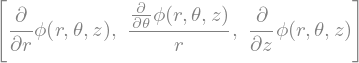

In [4]:
cylind.grad(phi)

### Grad of vector $\vec{u}$:

$$
\begin{aligned}
\nabla \vec{u} &=  \frac{\partial U_r}{\partial r} \hat{e}_r \hat{e}_r+\frac{\partial U_\theta}{\partial r} \hat{e}_r \hat{e}_\theta+\frac{\partial U_z}{\partial r} \hat{e}_r \hat{e}_z \\
        &\quad \quad \quad +\left(\frac{1}{r} \frac{\partial U_r}{\partial \theta}-\frac{U_\theta}{r}\right) \hat{e}_\theta \hat{e}_r
        +\left(\frac{1}{r} \frac{\partial U_\theta}{\partial \theta}+\frac{U_r}{r}\right) \hat{e}_\theta \hat{e}_\theta+\frac{1}{r} \frac{\partial U_z}{\partial \theta} \hat{e}_\theta \hat{e}_z \\
        &\quad \quad \quad +\frac{\partial U_r}{\partial z} \hat{e}_z \hat{e}_r+\frac{\partial U_\theta}{\partial z} \hat{e}_z \hat{e}_\theta+\frac{\partial U_z}{\partial z} \hat{e}_z \hat{e}_z
\end{aligned}
$$ 

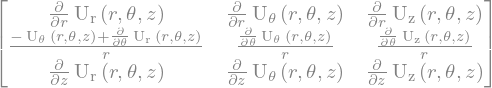

In [5]:
cylind.grad(U)

### Vector $\vec{u}$ dot the grad of $\vec{u}$:

$$
\begin{aligned}
\vec{u} \cdot \nabla \vec{u} &= \left[U_r \frac{\partial U_r}{\partial r}+U_\theta\left(\frac{1}{r} \frac{\partial U_r}{\partial \theta}-\frac{U_\theta}{r}\right)+U_z \frac{\partial U_r}{\partial z}\right] \hat{e}_r \\
        &+\left[U_r \frac{\partial U_\theta}{\partial r}+U_\theta\left(\frac{1}{r} \frac{\partial U_\theta}{\partial \theta}+\frac{U_r}{r}\right)+U_z \frac{\partial U_\theta}{\partial z}\right] \hat{e}_\theta \\
        &+\left[U_r \frac{\partial U_z}{\partial r}+U_\theta \frac{1}{r} \frac{\partial U_z}{\partial \theta}+U_z \frac{\partial U_z}{\partial z}\right] \hat{e}_z
\end{aligned}
$$ 

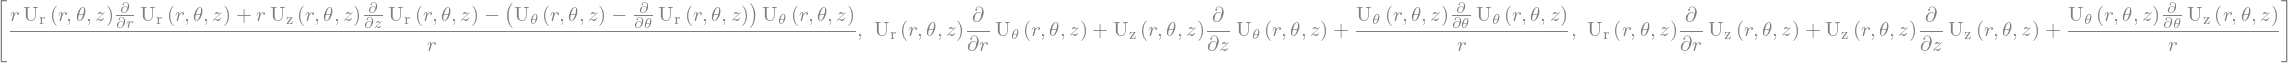

In [6]:
cylind.dot(U, cylind.grad(U))

### curl of vector $\vec{u}$:
$$
\begin{aligned}
\nabla \times \vec{u} &= \frac{1}{h_i} \sum_{j=1}^3\left(\frac{1}{h_j} \frac{\partial h_i}{\partial x_j} \hat{e}_j\right) \times \hat{e}_i \\
            &= \left( \frac{1}{r} \frac{\partial U_z}{\partial \theta} - \frac{\partial U_\theta}{\partial z} \right)\hat{e}_r + \left( \frac{\partial U_r}{\partial z} - \frac{\partial U_z}{\partial r}\right) \hat{e}_\theta + \left[ \frac{1}{r}\frac{\partial}{\partial r} (rU_\theta) - \frac{1}{r} \frac{\partial U_r}{\partial \theta} \right] \hat{e}_z \\  %%%%
\end{aligned}
$$

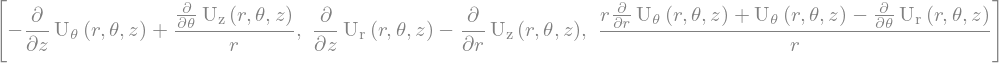

In [7]:
cylind.curl(U)

### Divergence of the tensor $\stackrel{\leftrightarrow}{T}$

$$
\begin{aligned}
\nabla \cdot \stackrel{\leftrightarrow}{T}=& {\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r T_{r r}\right)+\frac{1}{r} \frac{\partial T_{\theta r}}{\partial \theta}+\frac{\partial T_{z r}}{\partial z}-\frac{T_{\theta \theta}}{r}\right] \hat{e}_r } \\
        &\quad +\left[\frac{1}{r^2} \frac{\partial}{\partial r}\left(r^2 T_{r \theta}\right)+\frac{1}{r} \frac{\partial T_{\theta \theta}}{\partial \theta}+\frac{\partial T_{z \theta}}{\partial z}-\frac{T_{r \theta}-T_{\theta r}}{r}\right] \hat{e}_\theta \\
        &\quad +\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r T_{r z}\right)+\frac{1}{r} \frac{\partial T_{\theta z}}{\partial \theta}+\frac{\partial T_{z z}}{\partial z}\right] \hat{e}_z
\end{aligned}
$$

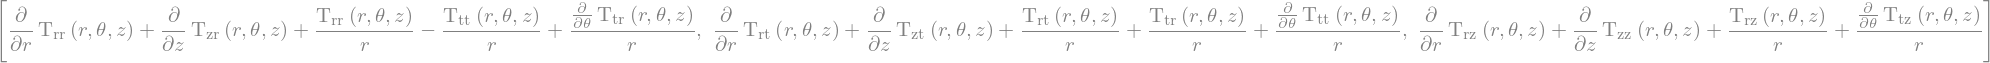

In [8]:
cylind.div(T)